In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import KernelPCA
from path import Path
from sklearn.model_selection import train_test_split
from numpy import linalg as LA
from lib.autoencoder import AutoEncoder
import tensorflow as tf

In [2]:
PROJ_DIR = Path().getcwd().parent
DATA_DIR = PROJ_DIR / "data"
df = pd.read_csv(DATA_DIR / 'lorenz_system_std.csv' )
df_T = df.T

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,-1.937633,1.381270,1.988279,0.835715,0.968418,-1.645801,-1.646132,-2.515123,2.460708,-2.075157,...,-2.627587,2.432361,-1.042502,-1.050354,1.542291,-0.422958,0.926161,1.937106,-1.822016,0.686985
1,-0.394863,0.774092,0.512229,-1.074370,-0.858107,-0.682986,0.960218,0.383680,-0.671683,-0.487563,...,0.268854,-0.690516,1.043099,1.057451,-1.004499,-0.960833,0.886788,-0.839151,0.945009,0.952096
2,-0.366827,0.554506,0.330681,-0.980174,-0.522248,-0.404951,1.027484,0.367840,-0.747522,-0.221396,...,0.566595,-0.755526,0.860717,1.016159,-0.938755,-0.880364,0.579221,-0.715003,0.959796,0.725132
3,-0.379129,0.753575,0.431119,-1.286658,-0.890797,-0.597829,1.276160,0.566055,-0.966139,-0.348711,...,0.611927,-0.981545,1.206939,1.305879,-1.248891,-1.102002,0.859573,-1.031675,1.235143,0.995638
4,-0.446492,0.708364,0.510405,-0.911352,-0.635741,-0.620787,0.815644,0.222540,-0.515195,-0.466990,...,0.205508,-0.530541,0.846515,0.901165,-0.821573,-0.873299,0.762806,-0.634090,0.777582,0.834671


In [4]:
X_train = df[:int(df.shape[0]*0.7)].values
X_test = df[int(df.shape[0]*0.7):].values

In [5]:
#AE = AutoencoderReduction(n_inputs=X_train.shape[1], n_hidden=10,n_outputs=X_train.shape[1], learning_rate=0.01)
AE = AutoEncoder(num_features=X_train.shape[1], num_latent_node = 10,activation_fun='relu',  lamda = 0.00001)
AE.model_settings()
AE.setting_train_test_DS(X_train, X_test)

W1118 14:30:23.691022 140319964714816 deprecation.py:506] From /home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [6]:
#latent_rep, rec_rep =AE.fit_predict(epochs=10000, training_set=X_train, test_set=X_test)
AE.fit(epochs=100)

Epoch 1/100
700/700 [==============================] - 0s 388us/sample - loss: 1.2208
Epoch 2/100
700/700 [==============================] - 0s 51us/sample - loss: 1.0332
Epoch 3/100
700/700 [==============================] - 0s 46us/sample - loss: 0.9141
Epoch 4/100
700/700 [==============================] - 0s 45us/sample - loss: 0.8289
Epoch 5/100
700/700 [==============================] - 0s 53us/sample - loss: 0.7628
Epoch 6/100
700/700 [==============================] - 0s 44us/sample - loss: 0.7086
Epoch 7/100
700/700 [==============================] - 0s 48us/sample - loss: 0.6612
Epoch 8/100
700/700 [==============================] - 0s 45us/sample - loss: 0.6189
Epoch 9/100
700/700 [==============================] - 0s 51us/sample - loss: 0.5801
Epoch 10/100
700/700 [==============================] - 0s 44us/sample - loss: 0.5442
Epoch 11/100
700/700 [==============================] - 0s 50us/sample - loss: 0.5107
Epoch 12/100
700/700 [==============================] - 0s 44u

In [7]:
rec_rep = AE.predict_test()

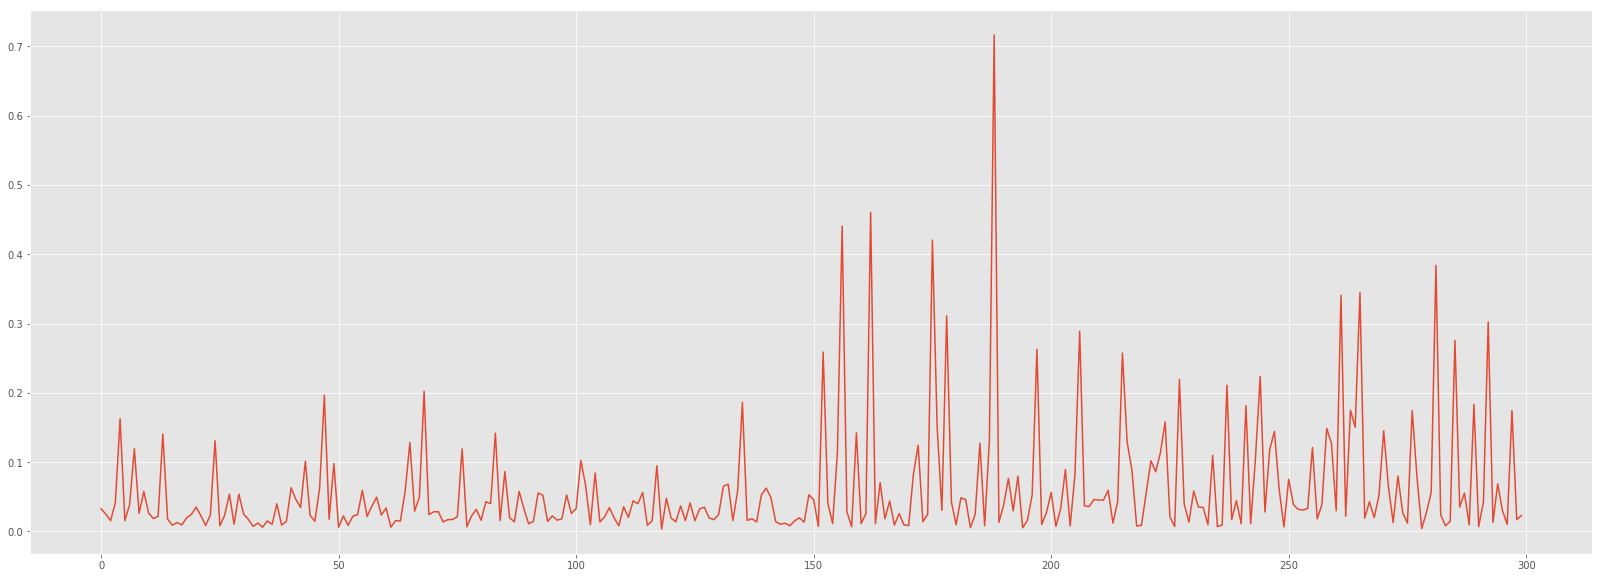

In [8]:
with plt.style.context('ggplot'):
    plt.figure(figsize=(28,10))
    plt.plot(AE.get_error_recustruction_test())

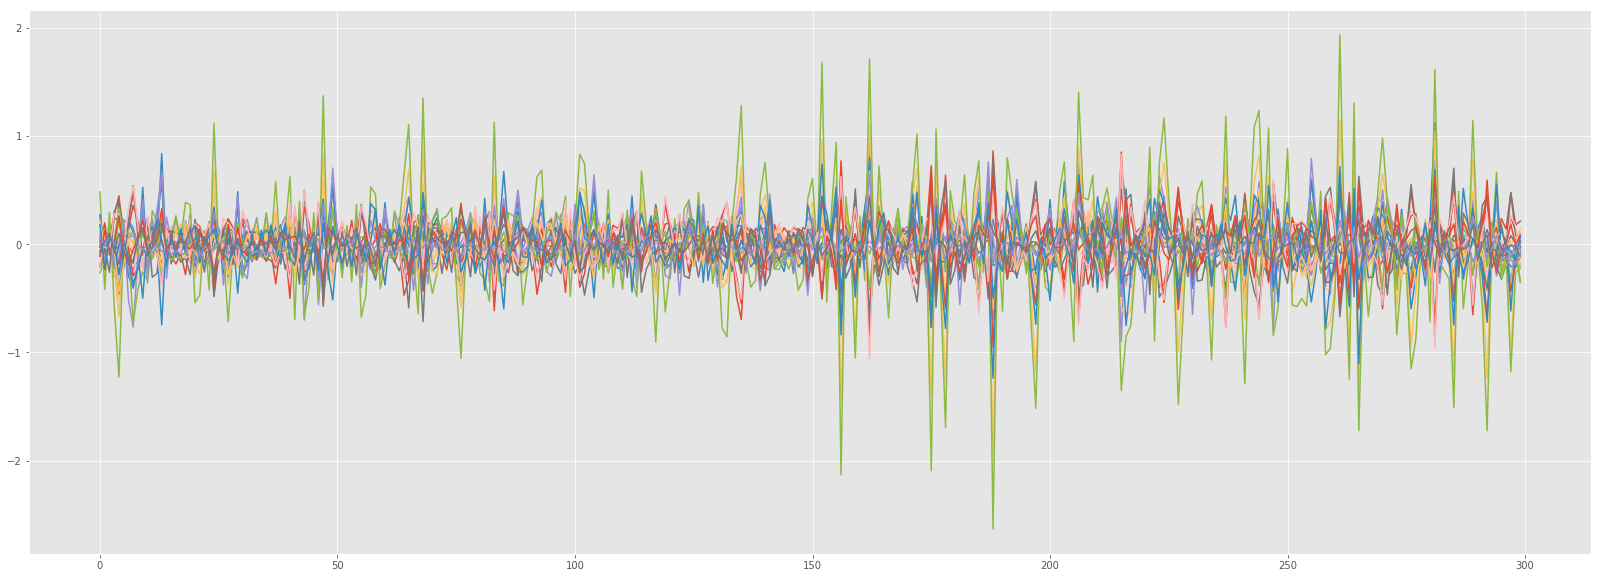

In [9]:
X=rec_rep.T
with plt.style.context('ggplot'):
    plt.figure(figsize=(28,10))
    for i in np.arange(0,25):
        plt.plot(np.arange(300), X_test.T[i,:]-X[i,:])

# Denosing Autoencoder

In [10]:
AE_denoising = AutoEncoder(num_features=25,num_latent_node=50, lamda = 0.00001)
AE_denoising.model_settings()
X_train_noise = X_train+np.random.normal(size=X_train.shape)
AE_denoising.setting_train_test_DS(X_train_noise, X_test)

In [11]:
type(X_train)

numpy.ndarray

In [12]:
AE_denoising.fit(epochs=1000)

Epoch 1/1000
700/700 [==============================] - 0s 403us/sample - loss: 2.6295
Epoch 2/1000
700/700 [==============================] - 0s 49us/sample - loss: 2.2303
Epoch 3/1000
700/700 [==============================] - 0s 69us/sample - loss: 1.9645
Epoch 4/1000
700/700 [==============================] - 0s 67us/sample - loss: 1.7663
Epoch 5/1000
700/700 [==============================] - 0s 75us/sample - loss: 1.6107
Epoch 6/1000
700/700 [==============================] - 0s 74us/sample - loss: 1.4847
Epoch 7/1000
700/700 [==============================] - 0s 66us/sample - loss: 1.3819
Epoch 8/1000
700/700 [==============================] - 0s 82us/sample - loss: 1.2966
Epoch 9/1000
700/700 [==============================] - 0s 60us/sample - loss: 1.2257
Epoch 10/1000
700/700 [==============================] - 0s 68us/sample - loss: 1.1662
Epoch 11/1000
700/700 [==============================] - 0s 66us/sample - loss: 1.1162
Epoch 12/1000
700/700 [============================

In [13]:
rec_rep = AE_denoising.predict_test()

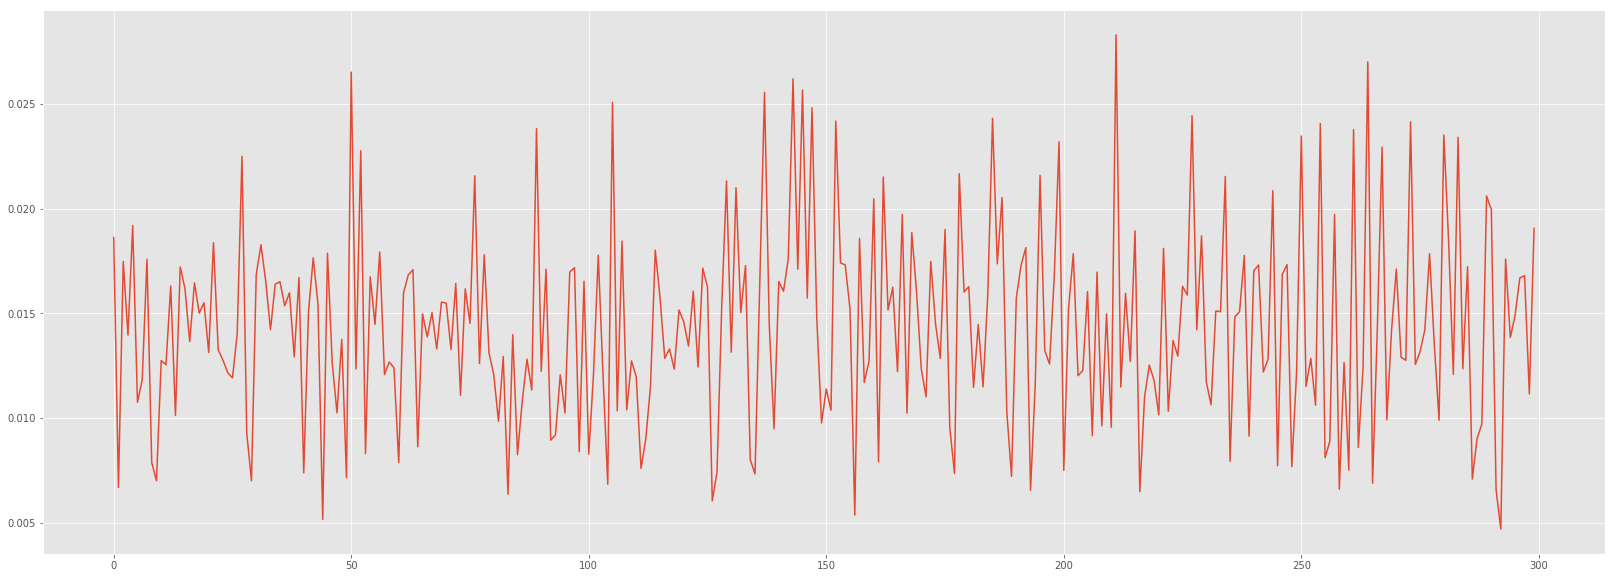

In [14]:
with plt.style.context('ggplot'):
    plt.figure(figsize=(28,10))
    plt.plot(AE_denoising.get_error_recustruction_test())

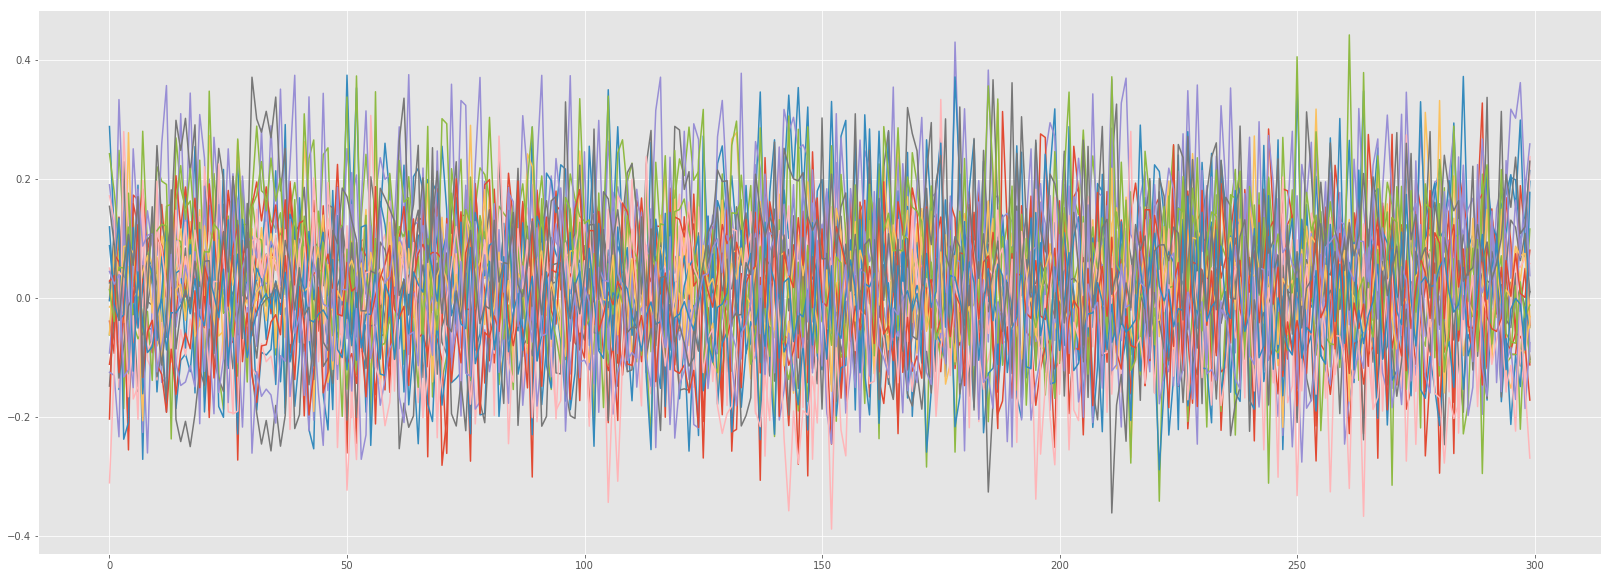

In [15]:
X=rec_rep.T
with plt.style.context('ggplot'):
    plt.figure(figsize=(28,10))
    for i in np.arange(0,25):
        plt.plot(np.arange(300), X_test.T[i,:]-X[i,:])

In [16]:
X

array([[ 1.9093378 ,  0.32139733, -0.82589173, ...,  0.6568023 ,
        -0.05251304,  1.7170932 ],
       [-2.3448896 , -0.23605134,  0.9751126 , ..., -0.98272765,
        -0.44563577, -1.9878966 ],
       [-2.1530294 , -0.25941092,  0.93068385, ..., -0.9228044 ,
        -0.27437925, -1.9002477 ],
       ...,
       [ 0.18520115, -0.05078624,  0.1453134 , ...,  1.0654688 ,
         0.780513  ,  0.24806483],
       [-0.66436553, -0.14522876, -0.1709024 , ..., -1.5351938 ,
        -0.88641924, -0.8880876 ],
       [-2.1207626 , -0.19991687,  0.74742234, ..., -1.2468257 ,
        -0.6025764 , -1.9824785 ]], dtype=float32)